CNN 모델로 MNIST 데이터셋 훈련 및 평가

In [46]:
import tensorflow as tf
from tensorflow import keras

In [52]:
# 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [53]:
print(f"x_train.shape: {x_train.shape}\nx_test.shape: {x_test.shape}")

x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


In [54]:
# 픽셀 값 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

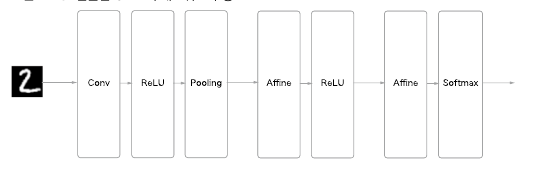

In [55]:
# 위 그림대로 모델 생성

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',
                        padding='same', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [56]:
model.summary()  # 모델 정보 출력

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               627300    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# 모델 훈련
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1681 - accuracy: 0.9503
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0574 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0368 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0263 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0187 - accuracy: 0.9940


In [62]:
# 모델 평가
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9849


In [71]:
print(f"loss: {loss:.3f}\n acc: {acc:.3f}")

loss: 0.051
 acc: 0.985
